In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from PIL import Image

import re
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("imdb_animated_movies_clean.csv")
df.head()

,name,rating,year,runtime_minutes,genres,genre_count,story_desc,story_word_count,avg_rating_score,votescore,...,worldwide_gross_usd,na_gross_usd,opening_weekend_usd,budget_est_usd,orig_bgt_currency,profit_usd,directors,director_count,writers,writer_count
0,9,PG-13,2009,79,"Action, Adventure, Drama, Fantasy, Sci-Fi, Thr...",6,A rag doll that awakens in a postapocalyptic f...,15,65.0,70.0,...,4842806,3174989,1074044,4200000,usd,642806,Shane Acker,1,"Pamela Pettler, Shane Acker, Ben Gluck",3
1,A Bug's Life,G,1998,95,"Adventure, Comedy, Family, Fantasy",4,"A misfit ant, looking for ""warriors"" to save h...",27,74.5,72.0,...,36325885,16279856,29112,16800000,usd,19525885,"John Lasseter, Andrew Stanton",2,"John Lasseter, Andrew Stanton, Joe Ranft",3
2,A Christmas Carol,PG,2009,96,"Adventure, Comedy, Drama, Family, Fantasy",5,An animated retelling of Charles Dickens' clas...,24,61.5,68.0,...,32528664,13785586,3005107,28000000,usd,4528664,Robert Zemeckis,1,"Charles Dickens, Robert Zemeckis",2
3,A Goofy Movie,G,1995,78,"Adventure, Comedy, Family, Musical, Romance",5,When Max makes a preposterous promise to a gir...,34,61.0,69.0,...,3534859,3534859,612955,2520000,usd,1014859,Kevin Lima,1,"Jymn Magon, Chris Matheson, Brian Pimental",3
4,A Scanner Darkly,R,2006,100,"Comedy, Crime, Drama, Mystery, Sci-Fi, Thriller",6,An undercover cop in a not-too-distant future ...,24,71.5,70.0,...,765991,550161,39167,1218000,usd,-452009,Richard Linklater,1,"Philip K. Dick, Richard Linklater",2


In [2]:
df.columns

Index(['name', 'rating', 'year', 'runtime_minutes', 'genres', 'genre_count',
       'story_desc', 'story_word_count', 'avg_rating_score', 'votescore',
       'metacritic', 'prod_company_count', 'production_companies',
       'aspect_ratio', 'production_countries', 'country_count', 'languages',
       'language_count', 'votes', 'avg_usd_budget_per_minute',
       'worldwide_gross_usd', 'na_gross_usd', 'opening_weekend_usd',
       'budget_est_usd', 'orig_bgt_currency', 'profit_usd', 'directors',
       'director_count', 'writers', 'writer_count'],
      dtype='object')

In [3]:
def check_boxoffice(b, p, w, n, o, r):
    if (b | p | w | n | o == -1) or "TV" in r:
        return 0
    return 1

In [4]:
df.insert(len(df.columns),'box_office',False)
df['box_office'] = df.apply(lambda x: check_boxoffice(x['budget_est_usd'], x['profit_usd'], 
                                                               x['worldwide_gross_usd'], x['na_gross_usd'], 
                                                               x['opening_weekend_usd'], x['rating']),axis=1)

In [5]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_df = df.select_dtypes(include=numerics)

In [6]:
num_df.columns

Index(['year', 'runtime_minutes', 'genre_count', 'story_word_count',
       'avg_rating_score', 'votescore', 'metacritic', 'prod_company_count',
       'country_count', 'language_count', 'votes', 'avg_usd_budget_per_minute',
       'worldwide_gross_usd', 'na_gross_usd', 'opening_weekend_usd',
       'budget_est_usd', 'profit_usd', 'director_count', 'writer_count',
       'box_office'],
      dtype='object')

<AxesSubplot:>

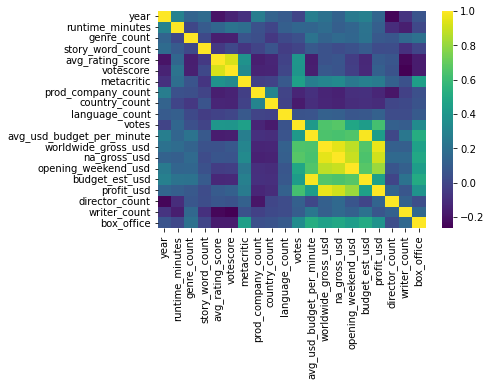

In [7]:
sns.heatmap(num_df.corr(), annot = False, cmap = 'viridis')

### Runtime

0.21450773915118732
0.1756710082790253
0.37052849025173357
0.25840095472256325


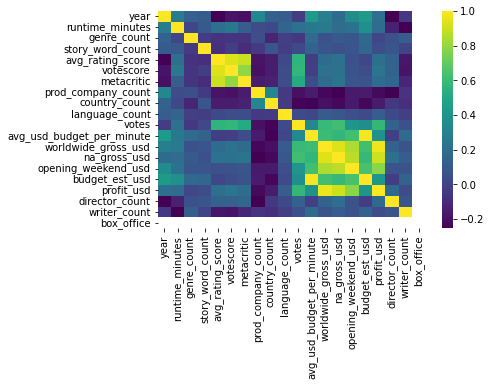

In [8]:
df_validBO = df[df['box_office'] == True]

sns.heatmap(df_validBO.corr(), annot = False, cmap = 'viridis')

print(df['budget_est_usd'].corr(df['runtime_minutes']))
print(df['worldwide_gross_usd'].corr(df['runtime_minutes']))
print(df_validBO['budget_est_usd'].corr(df_validBO['runtime_minutes']))
print(df_validBO['worldwide_gross_usd'].corr(df_validBO['runtime_minutes']))

Runtime within all movies


<AxesSubplot:xlabel='runtime_minutes'>

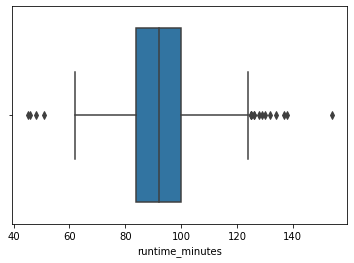

In [9]:
print("Runtime within all movies")
sns.boxplot(x=df['runtime_minutes'])

Within rating


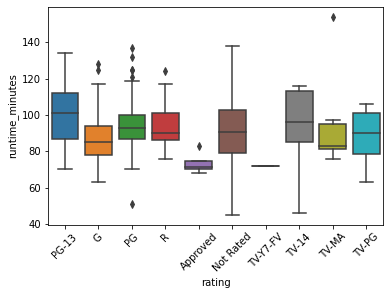

In [10]:
print("Within rating")
sns.boxplot(data=df ,y='runtime_minutes', x='rating')
plt.tick_params(axis='x', rotation=45)
plt.show()

Runtime of movies (box office only)


<AxesSubplot:xlabel='runtime_minutes'>

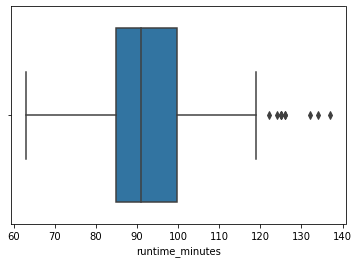

In [11]:
print("Runtime of movies (box office only)")
sns.boxplot(x=df_validBO['runtime_minutes'])

Runtime of movies (box office only) within rating


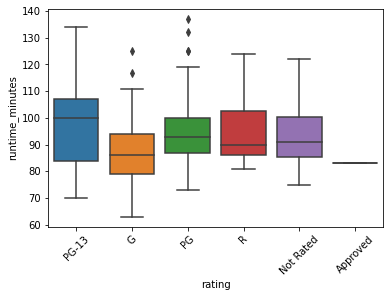

In [12]:
print("Runtime of movies (box office only) within rating")
sns.boxplot(data=df_validBO ,y='runtime_minutes', x='rating')
plt.tick_params(axis='x', rotation=45)
plt.show()

#### Shortest and longest movie

In [13]:
shortest_movie = df['runtime_minutes'].idxmin()
df.iloc[shortest_movie][{'name','year','budget_est_usd','runtime_minutes','genres'}]

name               To the Forest of Firefly Lights
genres                              Drama, Fantasy
year                                          2011
runtime_minutes                                 45
budget_est_usd                                  -1
Name: 153, dtype: object

In [14]:
longest_movie = df['runtime_minutes'].idxmax()
df.iloc[longest_movie][{'name','year','budget_est_usd','runtime_minutes','genres'}]

name               Evangelion: 3.0+1.01 Thrice Upon a Time
genres                               Action, Drama, Sci-Fi
year                                                  2021
runtime_minutes                                        154
budget_est_usd                                          -1
Name: 305, dtype: object

#### Shortest and longest movie in box office

In [15]:
shortest_movie = df_validBO['runtime_minutes'].idxmin()
df.iloc[shortest_movie][{'name','year','budget_est_usd','runtime_minutes','genres'}]

name                                                 Winnie the Pooh
genres             Adventure, Comedy, Drama, Family, Fantasy, Mus...
year                                                            2011
runtime_minutes                                                   63
budget_est_usd                                               4200000
Name: 459, dtype: object

In [16]:
longest_movie = df_validBO['runtime_minutes'].idxmax()
df.iloc[longest_movie][{'name','year','budget_est_usd','runtime_minutes','genres'}]

name               The Tale of The Princess Kaguya
genres                      Drama, Family, Fantasy
year                                          2013
runtime_minutes                                137
budget_est_usd                            36000000
Name: 180, dtype: object

### Genre

In [17]:
df['genres']

0      Action, Adventure, Drama, Fantasy, Sci-Fi, Thr...
1                     Adventure, Comedy, Family, Fantasy
2              Adventure, Comedy, Drama, Family, Fantasy
3            Adventure, Comedy, Family, Musical, Romance
4        Comedy, Crime, Drama, Mystery, Sci-Fi, Thriller
                             ...                        
464           Adventure, Comedy, Family, Fantasy, Sci-Fi
465                  Adventure, Comedy, Fantasy, Musical
466                            Adventure, Comedy, Family
467            Adventure, Comedy, Crime, Family, Mystery
468                               Drama, Family, Fantasy
Name: genres, Length: 469, dtype: object

In [18]:
import itertools

words = set(df['genres'].str.findall("[\w.\-]+").sum())
genres = set(words)

In [19]:
print(genres)

{'Mystery', 'Comedy', 'Sci-Fi', 'Horror', 'Musical', 'Adventure', 'Crime', 'Music', 'Western', 'Action', 'Romance', 'War', 'History', 'Family', 'Sport', 'Drama', 'Biography', 'Fantasy', 'Thriller'}


In [20]:
genre_dict = {}
for x in genres:
    genre_dict[x] = 0
for x in df['genres']:
    for y in x.split(', '):
        genre_dict[y] += 1

In [21]:
genre_dict

{'Mystery': 39,
 'Comedy': 302,
 'Sci-Fi': 129,
 'Horror': 26,
 'Musical': 92,
 'Adventure': 369,
 'Crime': 34,
 'Music': 21,
 'Western': 4,
 'Action': 121,
 'Romance': 60,
 'War': 10,
 'History': 5,
 'Family': 349,
 'Sport': 12,
 'Drama': 144,
 'Biography': 3,
 'Fantasy': 273,
 'Thriller': 34}

In [22]:
df[{'genres','votescore'}].head(5)

,genres,votescore
0,"Action, Adventure, Drama, Fantasy, Sci-Fi, Thr...",70.0
1,"Adventure, Comedy, Family, Fantasy",72.0
2,"Adventure, Comedy, Drama, Family, Fantasy",68.0
3,"Adventure, Comedy, Family, Musical, Romance",69.0
4,"Comedy, Crime, Drama, Mystery, Sci-Fi, Thriller",70.0


In [23]:
df.loc[df['metacritic'] > 1, ['metacritic']]

,metacritic
0,60.0
1,77.0
2,55.0
3,53.0
4,73.0
...,...
464,72.0
465,79.0
466,35.0
467,78.0


In [24]:
# def avg_votescore_by_keys(df, column, keys, freq):
#     score_by_col = {}
#     for x in range(len(df[{column,'votescore'}])):
#         for k in keys:
#             if k in df[column][x].split(', '):
#                 val = score_by_col.get(k,0)
#                 score_by_col[k] = val + df['votescore'][x]
#     for k in range(len(keys)):
#         score_by_col[keys[k]] = (score_by_col[keys[k]] / freq[k]).round(3)
    
#     return score_by_col

In [25]:
def avg_score_by_keys(df, column, keys):
    score_by_col = {}
    mc_by_col = {}
    counter_a, counter_b  = {}, {}
    
    for x in range(len(df[{column,'votescore','metacritic'}])):
        for k in keys:
            if k in df[column][x].split(', '):
                counter_a[k] = counter_a.get(k,0)
                
                val = score_by_col.get(k,0)

                score_by_col[k] = val + df['votescore'][x]
                counter_a[k] = counter_a.get(k) + 1
#                 print(f'{counter_a[k]} - {k}')
                if df['metacritic'][x] < 0:
                    continue
                else:
                    val_m = mc_by_col.get(k,0)
                    counter_b[k] = counter_b.get(k,0)
                    mc_by_col[k] = val_m + df['metacritic'][x]
                    counter_b[k] = counter_b.get(k) + 1

#     print(f'val:{val}, counter_a:{counter_a}')
#     print(mc_by_col)
    for k in keys:
        score_by_col[k] = (score_by_col.get(k) / counter_a[k]).round(3)
        
        if counter_b.get(k) is not None and mc_by_col.get(k) is not None:
            mc_by_col[k] = round(mc_by_col.get(k,-1) / counter_b.get(k,1),3)
    
    return score_by_col, mc_by_col, counter_b

In [26]:
keys = list(genre_dict.keys())
keys.sort()
vals = [genre_dict[k] for k in keys]

genre_avg_score, genre_avg_mc, count_b = avg_score_by_keys(df, 'genres', keys)

avgs_s = [genre_avg_score[k] for k in keys]
count_mc = [count_b[k] for k in keys]
avgs_mc = [genre_avg_mc[k] for k in keys]

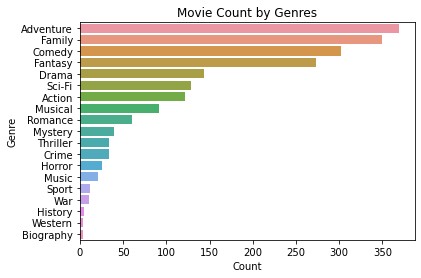

In [27]:
data_genre = {'genre':keys, 'count':vals, 'avg_score':avgs_s, 'avg_metacritic':avgs_mc, 'count_mc':count_mc}
df_genre = pd.DataFrame(data=data_genre)

ax = sns.barplot(data = df_genre.sort_values("count", ascending=False), y="genre", x="count")

plt.xlabel('Count')
plt.ylabel("Genre")
plt.title('Movie Count by Genres')

plt.show()

<AxesSubplot:xlabel='votescore'>

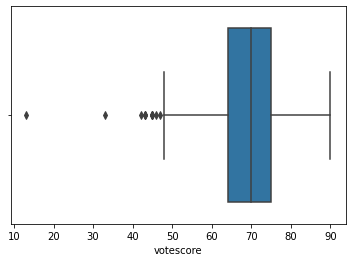

In [28]:
sns.boxplot(data=df, x="votescore")

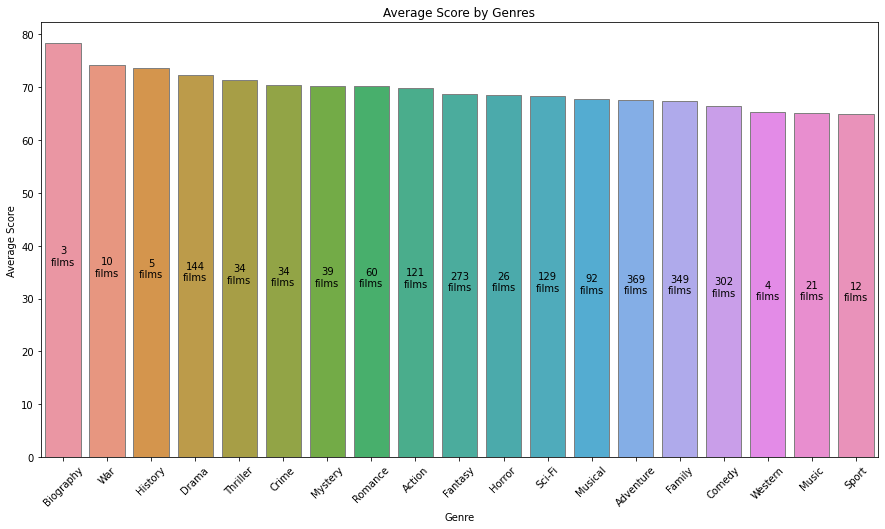

In [29]:
plt.figure(figsize = (15,8))
sorted_data_genre = df_genre.sort_values("avg_score", ascending=False)

ax = sns.barplot(data = sorted_data_genre, x="genre", y="avg_score", edgecolor = '.5')
plt.xlabel('Genre')
plt.ylabel("Average Score")
plt.title('Average Score by Genres')

labels = [f"\n{x}\nfilms" for x in sorted_data_genre['count']]
plt.bar_label(ax.containers[-1], labels = labels, label_type='center')

plt.tick_params(axis='x', rotation=45)
plt.show()

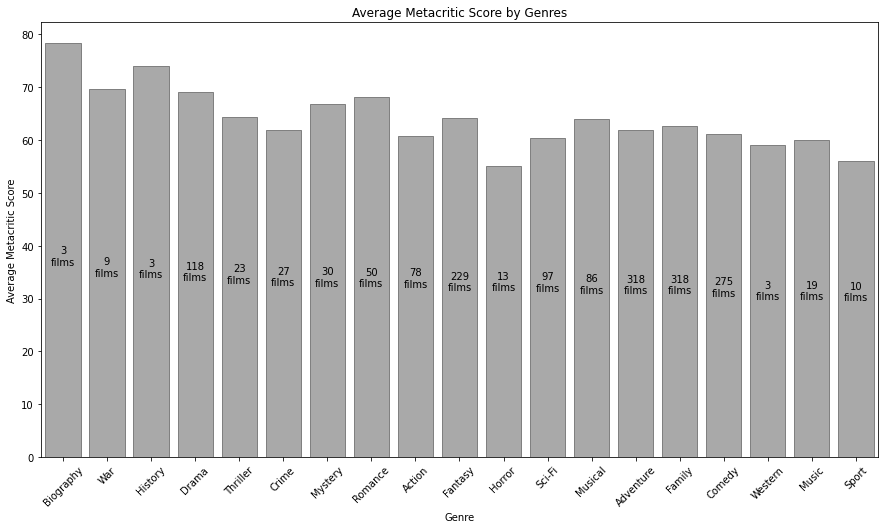

In [30]:
plt.figure(figsize = (15,8))

ax2 = sns.barplot(data = sorted_data_genre, x="genre", y="avg_metacritic", edgecolor = '.5', color='darkgray')
plt.xlabel('Genre')
plt.ylabel("Average Metacritic Score")
plt.title('Average Metacritic Score by Genres')

labels = [f"\n{x}\nfilms" for x in sorted_data_genre['count_mc']]
plt.bar_label(ax.containers[-1], labels = labels, label_type='center')

plt.tick_params(axis='x', rotation=45)
plt.show()

In [31]:
genre_misc = df.groupby(df[df['metacritic'] != -1]['genres']).mean()

In [32]:
genre_misc[{'votescore','metacritic'}].sort_values('votescore',ascending=False)

,votescore,metacritic
genres,,
"Adventure, Family, Fantasy, Mystery",86.0,96.0
"Drama, War",85.0,94.0
"Adventure, Family, Sci-Fi",84.0,95.0
"Action, Adventure, Fantasy",84.0,76.0
"Adventure, Comedy, Family, Fantasy, Music, Mystery",84.0,81.0
...,...,...
"Comedy, Musical",53.0,23.0
"Adventure, Comedy, Family, Fantasy, Musical, Mystery, Romance",52.0,36.0
"Adventure, Comedy, Family, Fantasy, Music, Musical",48.0,32.0


In [33]:
genre_misc[{'votescore','metacritic'}].sort_values('metacritic',ascending=False)

,votescore,metacritic
genres,,
"Adventure, Family, Fantasy, Mystery",86.0,96.0
"Adventure, Family, Sci-Fi",84.0,95.0
"Drama, War",85.0,94.0
"Family, Fantasy, Musical, Romance",76.5,90.0
"Biography, Drama, History, War",80.0,90.0
...,...,...
"Adventure, Comedy, Family, Fantasy, Musical, Mystery, Romance",52.0,36.0
"Action, Adventure, Fantasy, Sci-Fi",67.0,35.0
"Comedy, Fantasy",48.0,34.0


In [34]:
for g in df_genre['genre']:
    df[f'genre_{g.lower()}'] = df['genres'].apply(lambda x: 1 if g in x.lower() else 0)
    
# df['genre_adventure'] = df['genres'].apply(lambda x: 1 if 'adventure' in x.lower() else 0)
# df['genre_family'] = df['genres'].apply(lambda x: 1 if 'family' in x.lower() else 0)
# df['genre_comedy'] = df['genres'].apply(lambda x: 1 if 'comedy' in x.lower() else 0)
# df['genre_fantasy'] = df['genres'].apply(lambda x: 1 if 'fantasy' in x.lower() else 0)
# df['genre_drama'] = df['genres'].apply(lambda x: 1 if 'drama' in x.lower() else 0)
# df['genre_scifi'] = df['genres'].apply(lambda x: 1 if 'sci-fi' in x.lower() else 0)
# df['genre_action'] = df['genres'].apply(lambda x: 1 if 'action' in x.lower() else 0)
# df['genre_musical'] = df['genres'].apply(lambda x: 1 if 'musical' in x.lower() else 0)
# df['genre_romance'] = df['genres'].apply(lambda x: 1 if 'romance' in x.lower() else 0)

### Genre Count (in other words, how many genres does a movie typically have?)

<AxesSubplot:xlabel='count', ylabel='genre_count'>

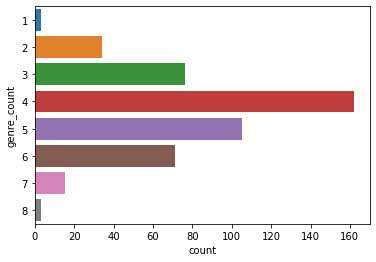

In [35]:
sns.countplot(y=num_df['genre_count'])

<AxesSubplot:xlabel='genre_count', ylabel='story_word_count'>

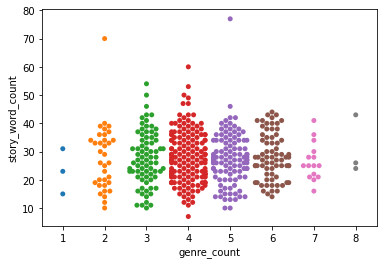

In [36]:
sns.swarmplot(y = df['story_word_count'], x = df['genre_count'])

<AxesSubplot:xlabel='genre_count', ylabel='votescore'>

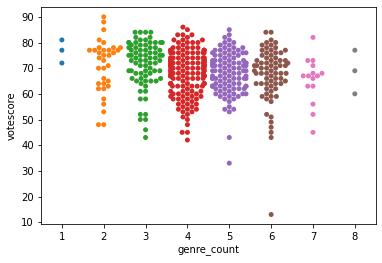

In [37]:
sns.swarmplot(y = df['votescore'], x = df['genre_count'])

In [38]:
df[{'genres','votescore'}].head(5)

,genres,votescore
0,"Action, Adventure, Drama, Fantasy, Sci-Fi, Thr...",70.0
1,"Adventure, Comedy, Family, Fantasy",72.0
2,"Adventure, Comedy, Drama, Family, Fantasy",68.0
3,"Adventure, Comedy, Family, Musical, Romance",69.0
4,"Comedy, Crime, Drama, Mystery, Sci-Fi, Thriller",70.0


# NEXT STEP: Story description

In [39]:
from wordcloud import WordCloud

In [40]:
stopwords = ''
with open("stop_words_english.txt") as t:
    stopwords = ' '.join(line for line in t).replace("\n","")

stopwords = stopwords.split()
stopwords.append('-')

In [41]:
stopwords

['able',
 'about',
 'above',
 'abroad',
 'according',
 'accordingly',
 'across',
 'actually',
 'adj',
 'after',
 'afterwards',
 'again',
 'against',
 'ago',
 'ahead',
 "ain't",
 'all',
 'allow',
 'allows',
 'almost',
 'alone',
 'along',
 'alongside',
 'already',
 'also',
 'although',
 'always',
 'am',
 'amid',
 'amidst',
 'among',
 'amongst',
 'an',
 'and',
 'another',
 'any',
 'anybody',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anyways',
 'anywhere',
 'apart',
 'appear',
 'appreciate',
 'appropriate',
 'are',
 "aren't",
 'around',
 'as',
 "a's",
 'aside',
 'ask',
 'asking',
 'associated',
 'at',
 'available',
 'away',
 'awfully',
 'back',
 'backward',
 'backwards',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'begin',
 'behind',
 'being',
 'believe',
 'below',
 'beside',
 'besides',
 'best',
 'better',
 'between',
 'beyond',
 'both',
 'brief',
 'but',
 'by',
 'came',
 'can',
 'cannot',
 'cant',
 "can't",
 'caption',
 'cau

In [42]:
story_words = df['story_desc'].str.lower().str.findall("[\w.\-']+").sum()

In [43]:
story_words

['a',
 'rag',
 'doll',
 'that',
 'awakens',
 'in',
 'a',
 'postapocalyptic',
 'future',
 'holds',
 'the',
 'key',
 'to',
 "humanity's",
 'salvation.',
 'a',
 'misfit',
 'ant',
 'looking',
 'for',
 'warriors',
 'to',
 'save',
 'his',
 'colony',
 'from',
 'greedy',
 'grasshoppers',
 'recruits',
 'a',
 'group',
 'of',
 'bugs',
 'that',
 'turn',
 'out',
 'to',
 'be',
 'an',
 'inept',
 'circus',
 'troupe.',
 'an',
 'animated',
 'retelling',
 'of',
 'charles',
 "dickens'",
 'classic',
 'novel',
 'about',
 'a',
 'victorian-era',
 'miser',
 'taken',
 'on',
 'a',
 'journey',
 'of',
 'self-redemption',
 'courtesy',
 'of',
 'several',
 'mysterious',
 'christmas',
 'apparitions.',
 'when',
 'max',
 'makes',
 'a',
 'preposterous',
 'promise',
 'to',
 'a',
 'girl',
 'he',
 'has',
 'a',
 'crush',
 'on',
 'his',
 'chances',
 'to',
 'fulfilling',
 'it',
 'seem',
 'hopeless',
 'when',
 'he',
 'is',
 'dragged',
 'onto',
 'a',
 'cross-country',
 'trip',
 'with',
 'his',
 'embarrassing',
 'father',
 'goofy

In [44]:
text = ' '.join(str(x) for x in story_words)

In [45]:
img_mask = np.array(Image.open("image_mask.png"))

In [46]:
def getFrequencyDict(words):
    temp = dataDict = {}

    # Dictionary counts frequencies
    for w in words:
        if w in stopwords:
            continue
        val = temp.get(w, 0)
        temp[w.lower()] = val + 1
    for key in temp:
        dataDict[key] = temp[key]
    
    return dataDict

In [47]:
freq_dict = getFrequencyDict(story_words)

In [48]:
w_keys = list(freq_dict.keys())
w_vals = [freq_dict[k] for k in w_keys]
    
data_wordfreq = {'word':w_keys, 'freq':w_vals}
df_wordfreq = pd.DataFrame(data=data_wordfreq, index=None)

In [49]:
df_wordfreq[df_wordfreq['freq'] > 10].sort_values("freq", ascending=False).head(15).style.hide_index()

word,freq
young,68
girl,38
save,37
boy,34
family,33
friends,27
named,23
man,22
evil,22
life,22


In [50]:
df['desc_girl'] = df['story_desc'].apply(lambda x: 1 if 'girl' in x.lower() else 0)
df['desc_boy'] = df['story_desc'].apply(lambda x: 1 if 'boy' in x.lower() else 0)
df['desc_young'] = df['story_desc'].apply(lambda x: 1 if 'young' in x.lower() else 0)
df['desc_family'] = df['story_desc'].apply(lambda x: 1 if 'family' in x.lower() else 0)
df['desc_friend'] = df['story_desc'].apply(lambda x: 1 if 'friend' in x.lower() else 0)
df['desc_save'] = df['story_desc'].apply(lambda x: 1 if 'save' in x.lower() else 0)
df['desc_evil'] = df['story_desc'].apply(lambda x: 1 if 'evil' in x.lower() else 0)

In [51]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 12,
                margin = 11,
                mask=img_mask,
                contour_width=.5, contour_color='lightgray').generate(text)

In [52]:
import random
def grey_color_func(**kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(75, 100)

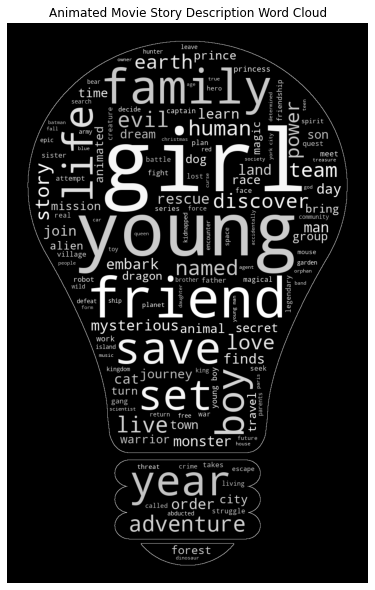

In [53]:
plt.figure(figsize = (10, 8), facecolor = "None")
plt.imshow(wordcloud.recolor(color_func=grey_color_func))
plt.axis("off")
plt.title("Animated Movie Story Description Word Cloud")
wordcloud.to_file("wordcloud.png")
plt.tight_layout(pad = 0)

plt.show()

### Production

In [54]:
df['production_companies']

0      Focus Features, Relativity Media, Arc Productions
1          Pixar Animation Studios, Walt Disney Pictures
2      Walt Disney Pictures, ImageMovers Digital, Ima...
3      Walt Disney Pictures, Disney Television Animat...
4      Warner Independent Pictures (WIP), Thousand Wo...
                             ...                        
464    Walt Disney Animation Studios, Walt Disney Pic...
465     Apple Corps, King Features Syndicate, TVC London
466    Warner Bros., Sunswept Entertainment, De Line ...
467    Walt Disney Pictures, Walt Disney Animation St...
468    Nippon Television Network (NTV), Studio Chizu,...
Name: production_companies, Length: 469, dtype: object

In [55]:
def getFreq(data):
    temp = dataDict = {}

    # Dictionary counts frequencies
    for c in data:
        for x in c.split(', '):
            val = temp.get(x.strip(), 0)
            temp[x] = val + 1
    for key in temp:
        dataDict[key] = temp[key]
    
    return dataDict

In [56]:
companies = getFreq(df['production_companies'])
print(companies)

{'Focus Features': 5, 'Relativity Media': 5, 'Arc Productions': 2, 'Pixar Animation Studios': 27, 'Walt Disney Pictures': 75, 'ImageMovers Digital': 2, 'ImageMovers': 3, 'Disney Television Animation': 6, 'Disneytoon Studios': 9, 'Warner Independent Pictures (WIP)': 1, 'Thousand Words': 2, 'Section Eight': 1, 'Aardman Animations': 8, 'Amazon Prime Video': 1, 'Anton': 2, 'DreamWorks Animation': 41, 'Pearl Studio': 1, 'China Film Co-Production': 1, 'Akira Committee Company Ltd.': 1, 'Akira Studio': 1, 'TMS Entertainment': 2, 'Silver Screen Partners IV': 5, 'Walt Disney Animation Studios': 56, 'Goldcrest Films International': 1, 'Don Bluth Productions': 2, 'DreamWorks Feature Animation': 1, 'Lions Gate Family Entertainment': 2, 'Crest Animation Productions': 1, 'Crest Animation Studios': 1, 'Fox 2000 Pictures': 4, 'New Regency Productions': 5, 'Bagdasarian Productions': 4, 'Universal Pictures': 18, 'U-Drive Productions': 1, 'Sullivan Studios': 1, 'Amblimation': 3, 'Amblin Entertainment': 5

In [57]:
c_keys = list(companies.keys())
c_keys.sort()
c_vals = [companies[k] for k in c_keys]
    
comp_avg_score, comp_avg_mc, comp_b = avg_score_by_keys(df, 'production_companies', c_keys)

avgs_s = [comp_avg_score[k] for k in c_keys]
count_mc = [comp_b.get(k,0) for k in c_keys]
avgs_mc = [comp_avg_mc.get(k,-1) for k in c_keys]

# data_genre = {'genre':keys, 'count':vals, 'avg_score':avgs_s, 'avg_metacritic':avgs_mc, 'count_mc':count_mc}
# df_genre = pd.DataFrame(data=data_genre)
    
data_company = {'company':c_keys, 'freq':c_vals, 'avg_score':avgs_s, 'avg_metacritic':avgs_mc, 'count_mc':count_mc}
df_company = pd.DataFrame(data=data_company, index=None)

In [58]:
df_company = df_company.drop_duplicates(subset=['company'], keep="first")
df_company_b = df_company.query('count_mc > 3 & freq > 5')

In [59]:
df_company_b.sort_values("freq", ascending=False).head(10).style

,company,freq,avg_score,avg_metacritic,count_mc
479,Walt Disney Pictures,75,71.853000,71.027000,73
476,Walt Disney Animation Studios,56,71.893000,72.691000,55
150,DreamWorks Animation,41,68.341000,62.317000,41
349,Pixar Animation Studios,27,75.407000,78.185000,27
111,Columbia Pictures,24,63.833000,55.750000,24
133,Dentsu,19,72.158000,68.812000,16
466,Universal Pictures,18,66.056000,54.467000,15
402,Sony Pictures Animation,18,64.222000,55.529000,17
460,Twentieth Century Fox Animation,17,64.882000,53.353000,17
482,Warner Bros.,16,63.312000,60.688000,16


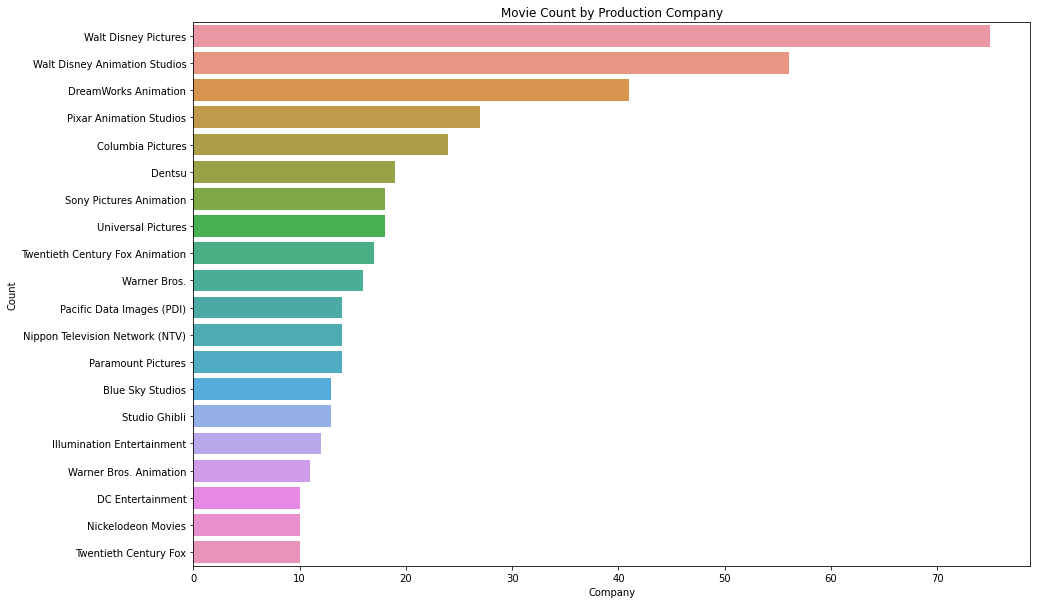

In [60]:
plt.figure(figsize = (15,10))
ax = sns.barplot(data = df_company.sort_values("freq", ascending=False).head(20), x="freq", y="company")

plt.xlabel('Company')
plt.ylabel("Count")
plt.title('Movie Count by Production Company')
# plt.tick_params(axis='x', rotation=90)
plt.show()

In [61]:
# sorted_data_comp.query('')

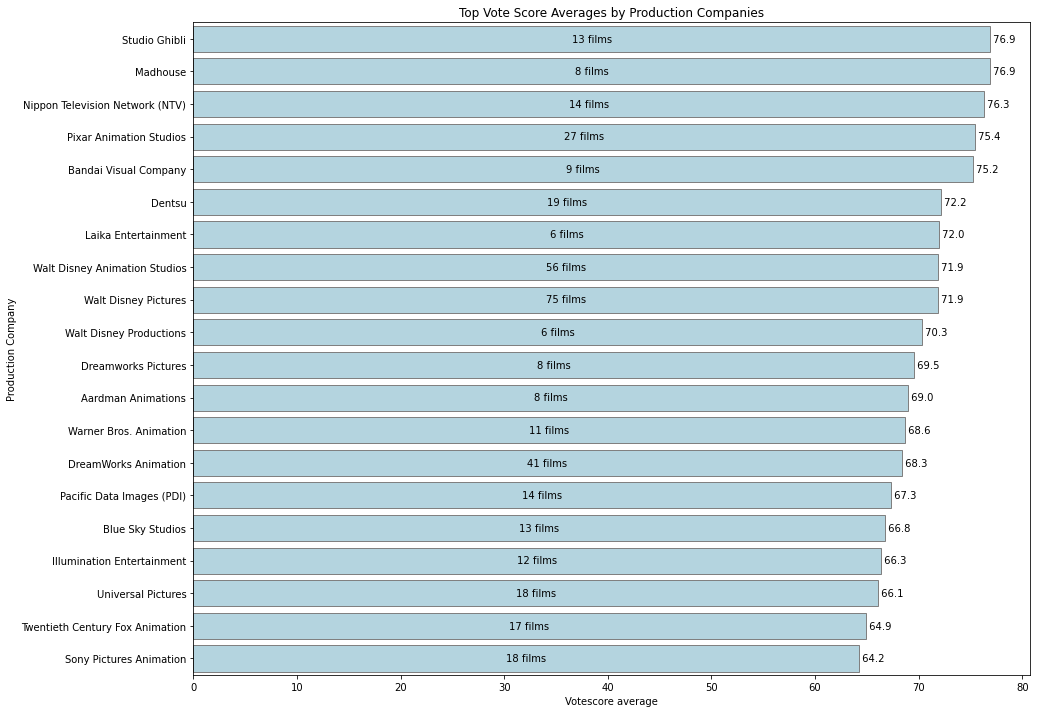

In [62]:
plt.figure(figsize = (15,12))
sorted_data_comp = df_company_b.sort_values("avg_score", ascending=False).head(20)

ax_c = sns.barplot(data = sorted_data_comp, y="company", x="avg_score", edgecolor = '.5', color="lightblue")
plt.xlabel('Votescore average')
plt.ylabel("Production Company")
plt.title('Top Vote Score Averages by Production Companies')

labels_a = [f"{x} films" for x in sorted_data_comp['freq']]
labels_b = [f" {round(b,1)}" for b in sorted_data_comp['avg_score']]

plt.bar_label(ax_c.containers[-1], labels = labels_a, label_type='center')
plt.bar_label(ax_c.containers[-1], labels = labels_b)

plt.show()

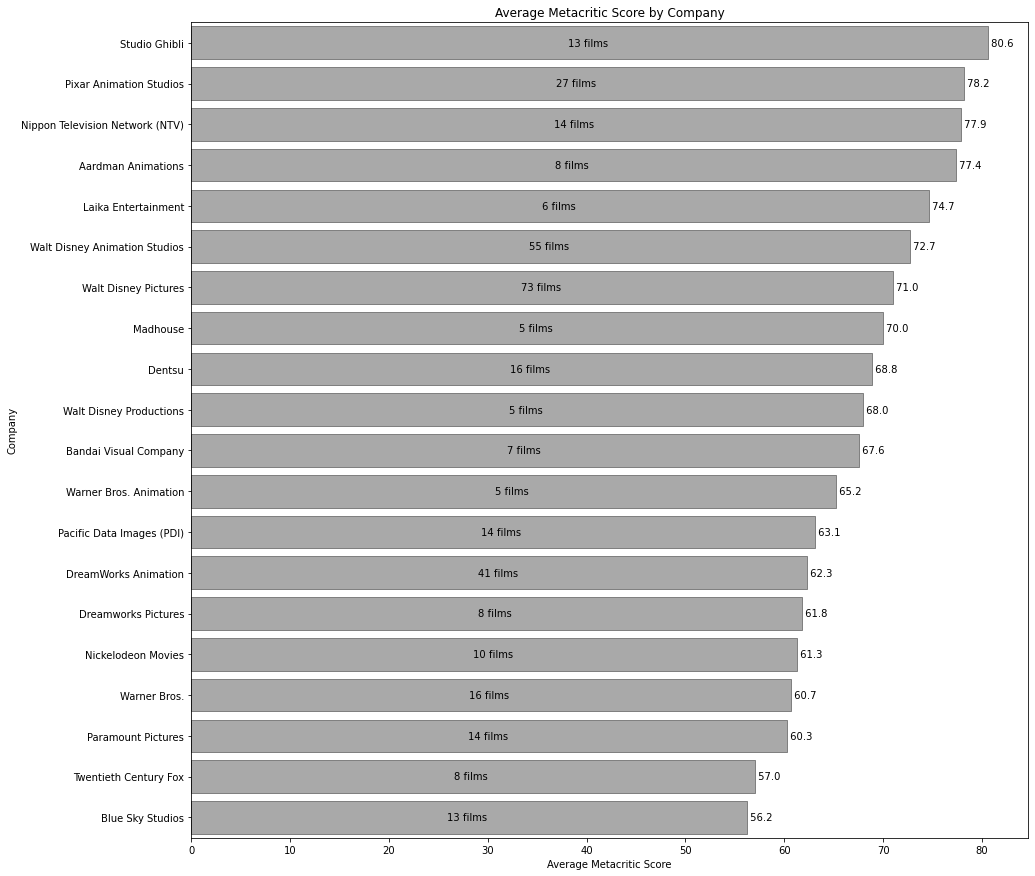

In [63]:
plt.figure(figsize = (15,15))
sorted_data_comp = df_company_b.sort_values("avg_metacritic", ascending=False).head(20)

ax2 = sns.barplot(data = sorted_data_comp, y="company", x="avg_metacritic", edgecolor = '.5', color='darkgray')
plt.ylabel('Company')
plt.xlabel("Average Metacritic Score")
plt.title('Average Metacritic Score by Company')

labels_a = [f"{a} films " for a in sorted_data_comp['count_mc']]
labels_b = [f" {round(b,1)}" for b in sorted_data_comp['avg_metacritic']]

plt.bar_label(ax2.containers[-1], labels = labels_a, label_type='center')
plt.bar_label(ax2.containers[-1], labels = labels_b)

# plt.tick_params(axis='x', rotation=45)
plt.show()

In [64]:
major_comps = ['disney', 'pixar', 'dreamworks', 'columbia', 'dentsu', 'sony', 'universal', 'fox', 'ghibli', 'paramount']

In [65]:
df['company_disney'] = df['production_companies'].apply(lambda x: 1 if 'disney' in x.lower() else 0)
df['company_dreamworks'] = df['production_companies'].apply(lambda x: 1 if 'dreamworks' in x.lower() else 0)
df['company_pixar'] = df['production_companies'].apply(lambda x: 1 if 'pixar' in x.lower() else 0)
df['company_columbia'] = df['production_companies'].apply(lambda x: 1 if 'columbia pictures' in x.lower() else 0)
df['company_dentsu'] = df['production_companies'].apply(lambda x: 1 if 'dentsu' in x.lower() else 0)
df['company_sony'] = df['production_companies'].apply(lambda x: 1 if 'sony' in x.lower() else 0)
df['company_universal'] = df['production_companies'].apply(lambda x: 1 if 'universal' in x.lower() else 0)
df['company_fox'] = df['production_companies'].apply(lambda x: 1 if 'fox' in x.lower() else 0)
df['company_ghibli'] = df['production_companies'].apply(lambda x: 1 if 'studio ghibli' in x.lower() else 0)
df['company_paramount'] = df['production_companies'].apply(lambda x: 1 if 'paramount' in x.lower() else 0)

df.insert(len(df.columns),'company_other',-1)
for w in range(len(df)):
    flag = False
    for x in major_comps:
        if df[f'company_{x}'][w] == 1:
            flag = True
            
    if flag:
        df['company_other'][w] = 0
    else:
        df['company_other'][w] = 1


In [66]:
df[df['company_other'] == 0][{'production_companies','company_other'}].head(10)

,company_other,production_companies
1,0,"Pixar Animation Studios, Walt Disney Pictures"
2,0,"Walt Disney Pictures, ImageMovers Digital, Ima..."
3,0,"Walt Disney Pictures, Disney Television Animat..."
6,0,"DreamWorks Animation, Pearl Studio, China Film..."
8,0,"Walt Disney Pictures, Silver Screen Partners I..."
9,0,Walt Disney Animation Studios
10,0,"Goldcrest Films International, Don Bluth Produ..."
12,0,"Fox 2000 Pictures, New Regency Productions, Ba..."
13,0,"Fox 2000 Pictures, New Regency Productions, Ba..."
14,0,"Fox 2000 Pictures, New Regency Productions, Ba..."


In [67]:
df[df['company_other'] == 1][{'production_companies','company_other'}].head(5)

,company_other,production_companies
0,1,"Focus Features, Relativity Media, Arc Productions"
4,1,"Warner Independent Pictures (WIP), Thousand Wo..."
5,1,"Aardman Animations, Amazon Prime Video, Anton"
7,1,"Akira Committee Company Ltd., Akira Studio, TM..."
11,1,"Lions Gate Family Entertainment, Crest Animati..."


### Aspect ratio

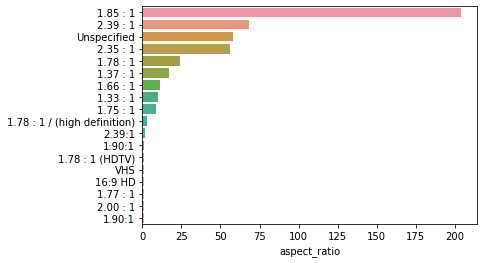

In [68]:
sns.barplot(y=df['aspect_ratio'].value_counts().index, x=df['aspect_ratio'].value_counts())
plt.tick_params(axis='x', rotation=0)
plt.show()

# NEXT STEP: Work more on countries

In [69]:
df['production_countries'].unique

<bound method Series.unique of 0             United States, Canada, Luxembourg
1                                 United States
2                                 United States
3      United States, Australia, France, Canada
4                                 United States
                         ...                   
464                               United States
465               United Kingdom, United States
466                  United States, New Zealand
467                               United States
468                                       Japan
Name: production_countries, Length: 469, dtype: object>

In [70]:
countries = getFreq(df['production_countries'])

In [71]:
countries

{'United States': 351,
 'Canada': 28,
 'Luxembourg': 7,
 'Australia': 17,
 'France': 41,
 'United Kingdom': 50,
 'Belgium': 15,
 'China': 8,
 'Japan': 110,
 'Ireland': 7,
 'India': 4,
 'Finland': 2,
 'Hong Kong': 6,
 'Denmark': 9,
 'Germany': 12,
 'United Arab Emirates': 1,
 'Taiwan': 1,
 'Norway': 2,
 'Serbia and Montenegro': 1,
 'South Korea': 5,
 'Spain': 6,
 'Czechoslovakia': 2,
 'Italy': 2,
 'Latvia': 1,
 'Poland': 2,
 'Switzerland': 3,
 'Netherlands': 1,
 'Hungary': 1,
 'West Germany': 2,
 'Czech Republic': 1,
 'New Zealand': 2,
 'Mexico': 1,
 'Israel': 1}

In [72]:
country_keys = list(countries.keys())
country_keys.sort()

country_vals = [countries[k] for k in country_keys]
    
country_avg_score, country_avg_mc, count_c = avg_score_by_keys(df, 'production_countries', country_keys)

avgs_s = [country_avg_score[k] for k in country_keys]
count_mc = [count_c.get(k,0) for k in country_keys]
avgs_mc = [country_avg_mc.get(k,-1) for k in country_keys]
    
# data_genre = {'genre':keys, 'count':vals, 'avg_score':avgs_s, 'avg_metacritic':avgs_mc, 'count_mc':count_mc}
# df_genre = pd.DataFrame(data=data_genre)
    
data_country = {'country':country_keys, 'freq':country_vals, 'avg_score': avgs_s, 'avg_metacritic': avgs_mc, 'count_mc': count_mc}
df_country = pd.DataFrame(data=data_country, index=None)

In [73]:
df_country = df_country.drop_duplicates(subset=['country'], keep="first")

<AxesSubplot:xlabel='freq', ylabel='country'>

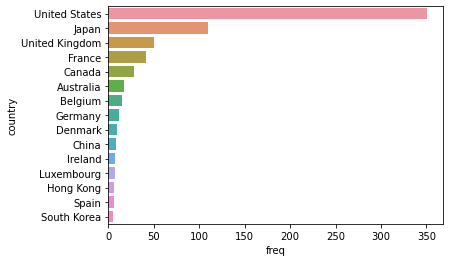

In [74]:
sns.barplot(data=df_country.sort_values("freq", ascending=False).head(15),y='country',x='freq')

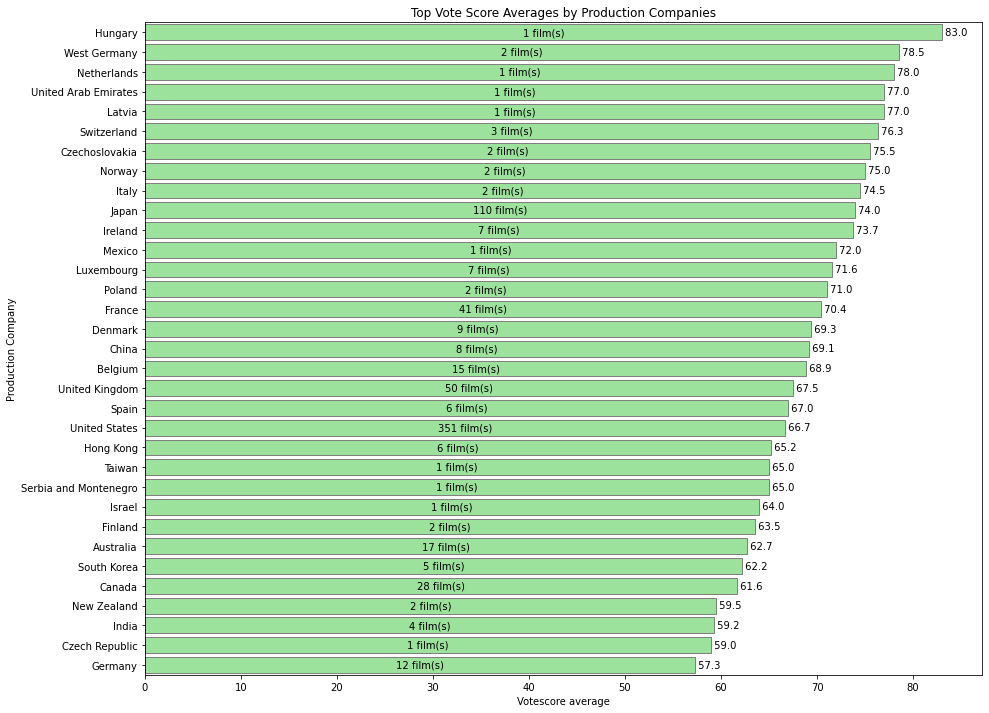

In [75]:
plt.figure(figsize = (15,12))
sorted_data_country = df_country.sort_values("avg_score", ascending=False)

ax_ctry = sns.barplot(data = sorted_data_country, y="country", x="avg_score", edgecolor = '.5', color="lightgreen")
plt.xlabel('Votescore average')
plt.ylabel("Production Company")
plt.title('Top Vote Score Averages by Production Companies')

labels_a = [f"{x} film(s)" for x in sorted_data_country['freq']]
labels_b = [f" {round(b,1)}" for b in sorted_data_country['avg_score']]

plt.bar_label(ax_ctry.containers[-1], labels = labels_a, label_type='center')
plt.bar_label(ax_ctry.containers[-1], labels = labels_b)

plt.show()

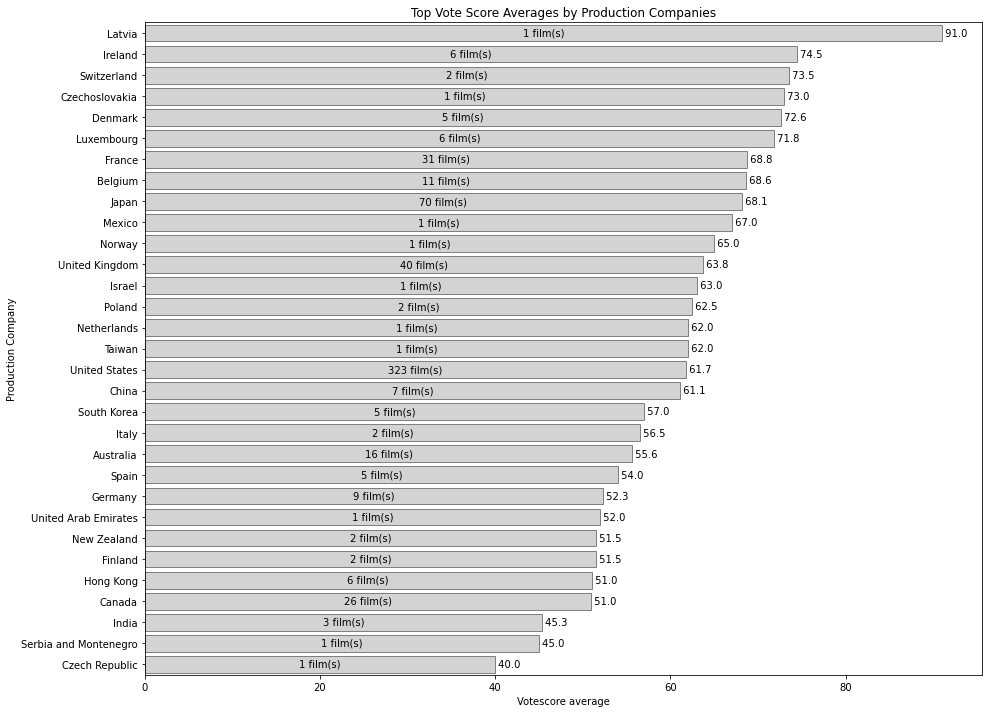

In [76]:
plt.figure(figsize = (15,12))
sorted_data_country = df_country.sort_values("avg_metacritic", ascending=False).query('avg_metacritic > 0')

ax_ctry = sns.barplot(data = sorted_data_country, y="country", x="avg_metacritic", edgecolor = '.5', color="lightgray")
plt.xlabel('Votescore average')
plt.ylabel("Production Company")
plt.title('Top Vote Score Averages by Production Companies')

labels_a = [f"{x} film(s)" for x in sorted_data_country['count_mc']]
labels_b = [f" {round(b,1)}" for b in sorted_data_country['avg_metacritic']]

plt.bar_label(ax_ctry.containers[-1], labels = labels_a, label_type='center')
plt.bar_label(ax_ctry.containers[-1], labels = labels_b)

plt.show()

# Continent

In [77]:
# Source: https://stackoverflow.com/questions/55910004/get-continent-name-from-country-using-pycountry
import pycountry_convert as pc

def country_to_continent(country_name):
    try:
        if "czech" in country_name.lower():
            country_name = "Czechia"
        if "serbia" in country_name.lower():
            country_name = "Serbia"
        if "germany" in country_name.lower():
            country_name = "Germany"
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    except KeyError:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name.split()[0])
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

df_country['continent'] = df_country['country'].apply(country_to_continent)

In [78]:
df_country[{'country','continent','freq'}]

,freq,continent,country
0,17,Oceania,Australia
1,15,Europe,Belgium
2,28,North America,Canada
3,8,Asia,China
4,1,Europe,Czech Republic
5,2,Europe,Czechoslovakia
6,9,Europe,Denmark
7,2,Europe,Finland
8,41,Europe,France
9,12,Europe,Germany


In [79]:
def make_df(data, counted_col, count_by_one=True, y="freq",):
    temp = dataDict = {}

    # Dictionary counts frequencies
    if count_by_one:
        for c in data:
            try:
                for x in c.split(', '):
                    val = temp.get(x.strip(), 0)
                    temp[x] = val + 1
            except AttributeError:
                    val = temp.get("Uncredited", 0)
                    temp[x] = val + 1
        for key in temp:
            dataDict[key] = temp[key]
    else:
        for i in range(len(data)):
            val = temp.get(data[counted_col][i], 0)
            temp[data[counted_col][i]] = val + data[y][i]
        for key in temp:
            dataDict[key] = temp[key]

    keys = list(dataDict.keys())
    vals = [dataDict[k] for k in keys]

    data_final = {counted_col:keys, y:vals}
    df_final = pd.DataFrame(data=data_final, index=None)
    
    return df_final

In [80]:
df_cont = make_df(df_country, 'continent', False)

In [81]:
df_cont

,continent,freq
0,Oceania,19
1,Europe,167
2,North America,380
3,Asia,136


<AxesSubplot:xlabel='continent', ylabel='freq'>

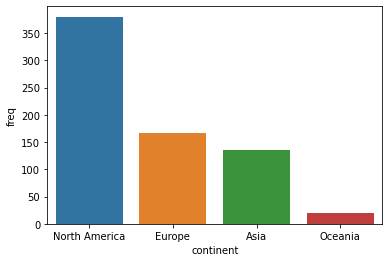

In [82]:
sns.barplot(data=df_cont.sort_values("freq",ascending=False), x='continent', y='freq')

In [83]:
def check_continents(data):
    cont_list = set()
    for x in data.split(', '):
#         print(x)
        val = country_to_continent(x)
#         print(val)
        cont_list.add(val) 
    return cont_list

In [84]:
df['continent_namerica'] = df['production_countries'].apply(lambda x: 1 if "North America" in check_continents(x) else 0)
df['continent_europe'] = df['production_countries'].apply(lambda x: 1 if "Europe" in check_continents(x) else 0)
df['continent_asia'] = df['production_countries'].apply(lambda x: 1 if "Asia" in check_continents(x) else 0)
df['continent_oceania'] = df['production_countries'].apply(lambda x: 1 if "Oceania" in check_continents(x) else 0)

In [85]:
df.head(5)

,name,rating,year,runtime_minutes,genres,genre_count,story_desc,story_word_count,avg_rating_score,votescore,...,company_sony,company_universal,company_fox,company_ghibli,company_paramount,company_other,continent_namerica,continent_europe,continent_asia,continent_oceania
0,9,PG-13,2009,79,"Action, Adventure, Drama, Fantasy, Sci-Fi, Thr...",6,A rag doll that awakens in a postapocalyptic f...,15,65.0,70.0,...,0,0,0,0,0,1,1,1,0,0
1,A Bug's Life,G,1998,95,"Adventure, Comedy, Family, Fantasy",4,"A misfit ant, looking for ""warriors"" to save h...",27,74.5,72.0,...,0,0,0,0,0,0,1,0,0,0
2,A Christmas Carol,PG,2009,96,"Adventure, Comedy, Drama, Family, Fantasy",5,An animated retelling of Charles Dickens' clas...,24,61.5,68.0,...,0,0,0,0,0,0,1,0,0,0
3,A Goofy Movie,G,1995,78,"Adventure, Comedy, Family, Musical, Romance",5,When Max makes a preposterous promise to a gir...,34,61.0,69.0,...,0,0,0,0,0,0,1,1,0,1
4,A Scanner Darkly,R,2006,100,"Comedy, Crime, Drama, Mystery, Sci-Fi, Thriller",6,An undercover cop in a not-too-distant future ...,24,71.5,70.0,...,0,0,0,0,0,1,1,0,0,0


### Language and Country

<AxesSubplot:xlabel='country_count', ylabel='language_count'>

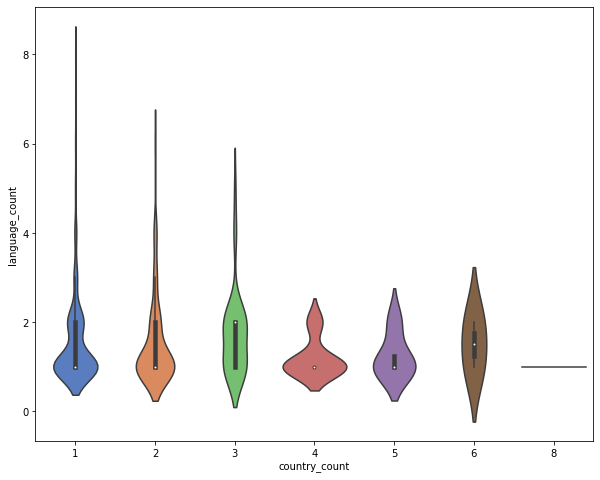

In [86]:
plt.figure(figsize = (10,8))
sns.violinplot(data=df, x="country_count",
                y="language_count", palette="muted")

<AxesSubplot:xlabel='language_count', ylabel='count'>

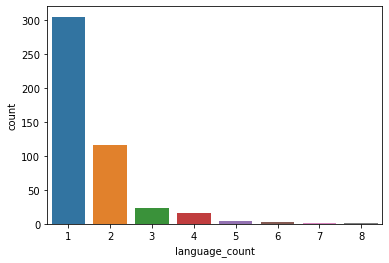

In [87]:
sns.countplot(data=df,x="language_count")

In [88]:
df_lang = make_df(df['languages'], 'languages', True)

<AxesSubplot:xlabel='freq', ylabel='languages'>

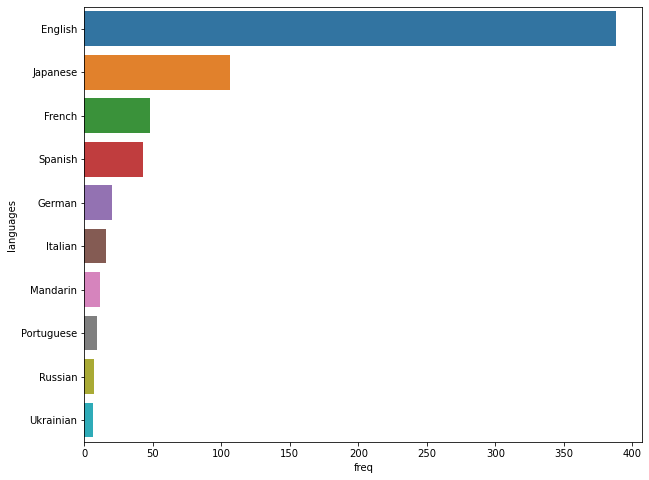

In [89]:
plt.figure(figsize = (10,8))
sns.barplot(data=df_lang.sort_values("freq",ascending=False).head(10),y='languages',x='freq')

In [90]:
df['lang_english'] = df['languages'].apply(lambda x: 1 if "English" in x else 0)
df['lang_japanese'] = df['languages'].apply(lambda x: 1 if "Japanese" in x else 0)
df['lang_french'] = df['languages'].apply(lambda x: 1 if "French" in x else 0)
df['lang_spanish'] = df['languages'].apply(lambda x: 1 if "Spanish" in x else 0)
df['lang_german'] = df['languages'].apply(lambda x: 1 if "German" in x else 0)

# Director / Writers

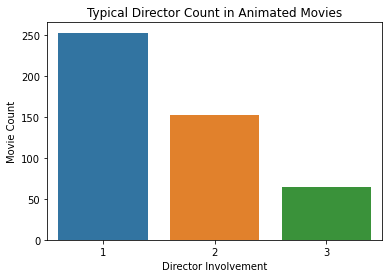

In [91]:
sns.countplot(data=df.sort_values("director_count",ascending=False), x='director_count')
plt.title('Typical Director Count in Animated Movies')
plt.ylabel('Movie Count')
plt.xlabel('Director Involvement')
plt.show()

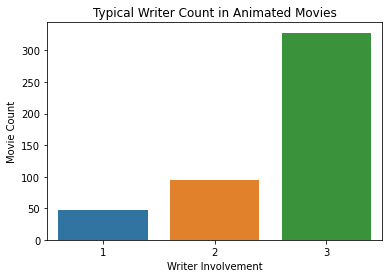

In [92]:
sns.countplot(data=df.sort_values("writer_count",ascending=False), x='writer_count')
plt.title('Typical Writer Count in Animated Movies')
plt.ylabel('Movie Count')
plt.xlabel('Writer Involvement')
plt.show()

In [93]:
df_dir = make_df(df['directors'], 'director', True)

In [94]:
df_wri = make_df(df['writers'], 'writer', True)

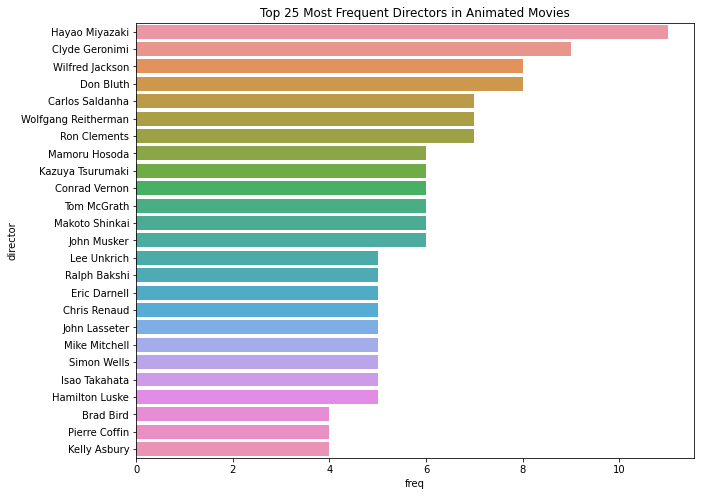

In [95]:
plt.figure(figsize = (10,8))
sns.barplot(data=df_dir.sort_values("freq",ascending=False).head(25), x="freq", y="director")
plt.title('Top 25 Most Frequent Directors in Animated Movies')
plt.show()

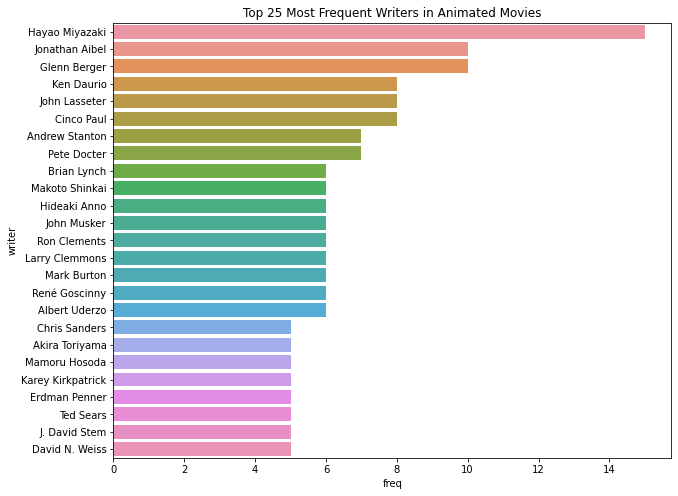

In [96]:
plt.figure(figsize = (10,8))
sns.barplot(data=df_wri.sort_values("freq",ascending=False).head(25), x="freq", y="writer")
plt.title('Top 25 Most Frequent Writers in Animated Movies')
plt.show()

### Box Office

In [97]:
a = df.groupby(df[df['box_office'] > 0]['year']).budget_est_usd.median()

In [98]:
b = df.groupby(df[df['box_office'] > 0]['year']).profit_usd.median()

In [99]:
c = df.groupby(df[df['box_office'] > 0]['year']).worldwide_gross_usd.median()

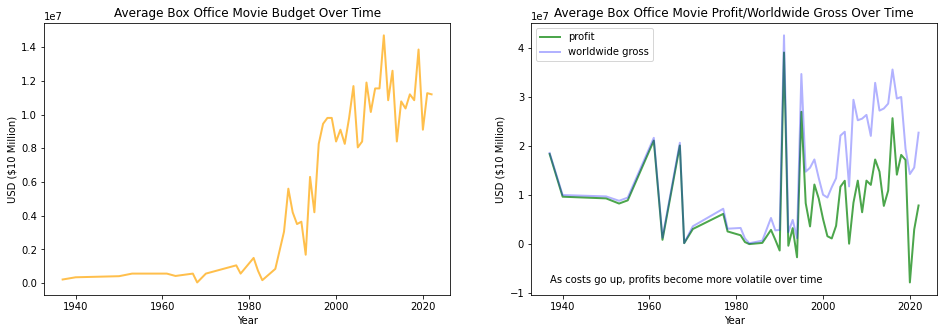

In [100]:
years = a.index.astype(int)

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

axes[0].plot(years, a.values.astype(float).round(2), lw=2, color="orange", alpha=0.7, label="budget")
axes[1].plot(years, b.values.astype(float).round(2), lw=2, color="green", alpha=.7, label="profit")
axes[1].plot(years, c.values.astype(float).round(2), lw=2, color="blue", alpha=.3, label="worldwide gross")

axes[0].set_title("Average Box Office Movie Budget Over Time")
axes[1].set_title("Average Box Office Movie Profit/Worldwide Gross Over Time")

axes[0].set_xlabel("Year")
axes[1].set_xlabel("Year")

axes[0].set_ylabel("USD ($10 Million)")
axes[1].set_ylabel("USD ($10 Million)")

axes[1].annotate("As costs go up, profits become more volatile over time",
            xy=(550, 50), xycoords='figure pixels')

plt.legend(loc="upper left")
plt.show()


In [101]:
r = df.groupby(df['year']).runtime_minutes.mean().astype(float).round(2)
bpm = df.groupby(df['year']).avg_usd_budget_per_minute.median().astype(float).round(2)

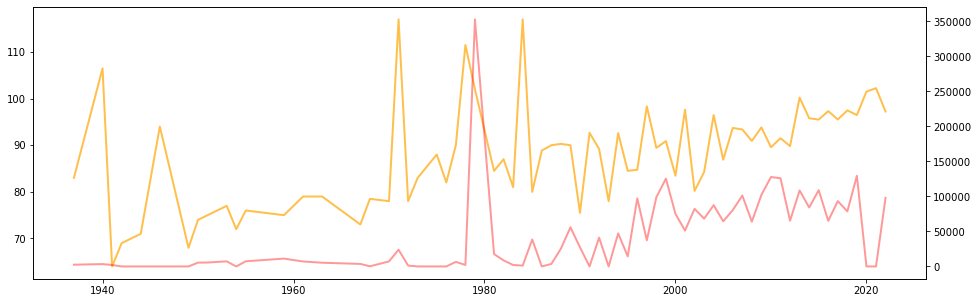

In [102]:
fig, ax = plt.subplots(figsize=(16, 5))
ax2 = ax.twinx()

ax.plot(r.index, r.values.astype(float).round(2), lw=2, color="orange", alpha=0.7, label="runtime")
ax2.plot(bpm.index, bpm.values.astype(float).round(2), lw=2, color="red", alpha=0.4, label="runtime")

# Votescore / Metacritic

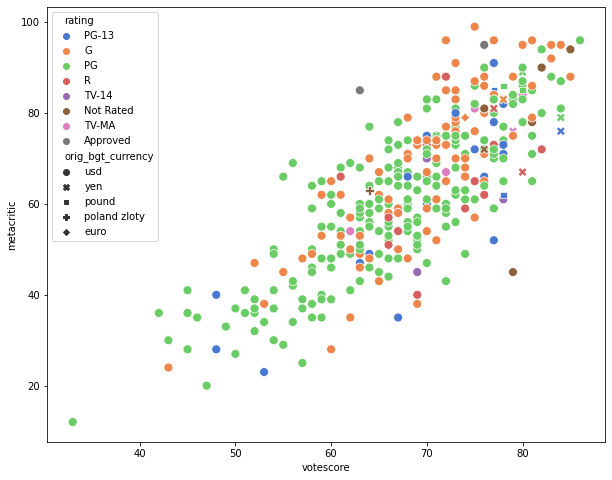

In [103]:
plt.figure(figsize = (10,8))
sns.scatterplot(data=df[df['metacritic'] != -1], y="metacritic" ,x="votescore",
                s=80,hue="rating", palette="muted", style="orig_bgt_currency")
plt.show()

In [104]:
score_cols = ['name','avg_rating_score','metacritic','votescore','votes']
print("Worst movies by votescore")
df[score_cols].sort_values("votescore", ascending=True).head(6).style.hide_index()

Worst movies by votescore


name,avg_rating_score,metacritic,votescore,votes
Foodfight!,13.000000,-1.000000,13.000000,11079
The Emoji Movie,22.500000,12.000000,33.000000,65026
The Adventures of Rocky & Bullwinkle,39.000000,36.000000,42.000000,20477
Cats & Dogs: The Revenge of Kitty Galore,36.500000,30.000000,43.000000,15413
The Ice Age Adventures of Buck Wild,36.500000,30.000000,43.000000,13726
Alvin and the Chipmunks: Chipwrecked,33.500000,24.000000,43.000000,35993


In [105]:
df[df['metacritic'] != -1.0][score_cols].sort_values("metacritic", ascending=True).head(5).style.hide_index()

name,avg_rating_score,metacritic,votescore,votes
The Emoji Movie,22.500000,12.000000,33.000000,65026
Hoodwinked 2: Hood vs. Evil,33.500000,20.000000,47.000000,13237
Eight Crazy Nights,38.000000,23.000000,53.000000,23398
Alvin and the Chipmunks: Chipwrecked,33.500000,24.000000,43.000000,35993
Strange Magic,41.000000,25.000000,57.000000,11367


In [106]:
df[score_cols].sort_values("votescore", ascending=False).head(5).style.hide_index()

name,avg_rating_score,metacritic,votescore,votes
Demon Slayer: Kimetsu no Yaiba - Tsuzumi Mansion Arc,90.000000,-1.000000,90.000000,13893
Demon Slayer: Kimetsu no Yaiba - Mt. Natagumo Arc,88.000000,-1.000000,88.000000,11396
Spirited Away,91.000000,96.000000,86.000000,759108
Grave of the Fireflies,89.500000,94.000000,85.000000,276852
The Lion King,86.500000,88.000000,85.000000,1053389


In [107]:
print("Best movies by votescore")
df[df['metacritic'] != -1.0][score_cols].sort_values("votescore", ascending=False).head(5).style.hide_index()

Best movies by votescore


name,avg_rating_score,metacritic,votescore,votes
Spirited Away,91.000000,96.000000,86.000000,759108
Grave of the Fireflies,89.500000,94.000000,85.000000,276852
The Lion King,86.500000,88.000000,85.000000,1053389
Spider-Man: Into the Spider-Verse,85.500000,87.000000,84.000000,523879
WALL·E,89.500000,95.000000,84.000000,1111600


In [108]:
df[df['metacritic'] != -1.0][score_cols].sort_values("metacritic", ascending=False).head(5).style.hide_index()

name,avg_rating_score,metacritic,votescore,votes
Pinocchio,87.000000,99.000000,75.000000,147930
Dumbo,84.000000,96.000000,72.000000,132976
Fantasia,86.500000,96.000000,77.000000,97274
Spirited Away,91.000000,96.000000,86.000000,759108
Ratatouille,88.500000,96.000000,81.000000,733650


# END

In [109]:
df.columns

Index(['name', 'rating', 'year', 'runtime_minutes', 'genres', 'genre_count',
       'story_desc', 'story_word_count', 'avg_rating_score', 'votescore',
       'metacritic', 'prod_company_count', 'production_companies',
       'aspect_ratio', 'production_countries', 'country_count', 'languages',
       'language_count', 'votes', 'avg_usd_budget_per_minute',
       'worldwide_gross_usd', 'na_gross_usd', 'opening_weekend_usd',
       'budget_est_usd', 'orig_bgt_currency', 'profit_usd', 'directors',
       'director_count', 'writers', 'writer_count', 'box_office',
       'genre_action', 'genre_adventure', 'genre_biography', 'genre_comedy',
       'genre_crime', 'genre_drama', 'genre_family', 'genre_fantasy',
       'genre_history', 'genre_horror', 'genre_music', 'genre_musical',
       'genre_mystery', 'genre_romance', 'genre_sci-fi', 'genre_sport',
       'genre_thriller', 'genre_war', 'genre_western', 'desc_girl', 'desc_boy',
       'desc_young', 'desc_family', 'desc_friend', 'desc_save',

In [110]:
df.to_csv("imdb_eda.csv", index = False)